# Bellabeat Case Study

Bellabeat is a manufacturer for health-tech products for women. The company was founded in 2013 by Urška Sršen and Sando Mur and has expanded quickly since then. Bellabeat has an array of products/smart devices which help user track various health related parameters like activity, sleep, hydration level, menstrual cycle etc. which helps empower women with an understanding of their own health and habits. 

Here is the product line offered by Bellabeat:
1.	Bellabeat app: An application which provides user an insight into their health by providing data in various parameters like activity levels, sleep, menstrual cycle etc. The Bellabeat app usually must be paired with one of the following devices mentioned below.
2.	Leaf: A classic wellness tracker that can be worn as bracelet, necklace or clip and connects seamlessly with the Bellabeat app.
3.	Time: A fashionable smartwatch variant which can replace the conventional watch. Like its sibling Leaf, Time also helps users track various fitness parameters and connects seamlessly with the Bellabeat app. 
4.	Spring: Unlike Leaf and Time, Spring is a water bottle offered by Bellabeat which can help users track hydration levels. 

## Act

### Business Task
Analyze competitor data (Fitbit) to derive insights and identify potential opportunities for growth and provide recommendations for Bellabeat marketing strategy.

Key Stakeholders:
1.	Urška Sršen - Cofounder and Chief Creative Officer
2.	Sando Mur – Cofounder and Mathematician
3.	Bellabeat marketing analytics team – A team of data analysts responsible for collecting, analyzing and reporting data in order to help guide Bellabeat marketing strategy.


## Prepare:

**Details about the dataset:**

The data for this analysis will come from [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) on Kaggle. These 18 datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016–05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

**Limitations of the data:**

There are a few limitations to the data which include the following:
1.	The sample size is limited (only 33 participants).
2.	User information such as sex and age is not included.
For this analysis the datasets for daily activity, daily calories, daily intensities, daily steps and weight log information, will be used.
R Studio was used to complete this analysis because of the many packages and data visualization features available to explore the data with.
)

For this analysis the datasets for daily activity, daily calories, daily intensities, daily steps and weight log information, will be used.

R Studio was used to complete this analysis because of the many packages and data visualization features available to explore the data with.



### Installing and Loading Packages

For this analysis we have imported “tidyverse”, “here” ,”lubridate” and “dplyr” packages. The csv files were imported into R Studio and the data frames were created with simple names.

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
activity <- read.csv("/Users/arvindsmac/Downloads/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("/Users/arvindsmac/Downloads/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("/Users/arvindsmac/Downloads/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("/Users/arvindsmac/Downloads/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/Users/arvindsmac/Downloads/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

**Checking dataframes**  
We now check the newly created dataframes

In [3]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
head(calories)

,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


In [5]:
head(intensities)

,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [6]:
head(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


## Process

### Cleaning/Manipulating the data:

Since the timestamp column is incorrect, it must be converted into appropriate data and time format and split separately into date and time.

**Note:**
Here, we have taken the hourly data for calories and intensities instead of the daily data for the following reasons:
1. Taking hourly data helps our analysis to be more precise
2. Daily calorie and intensity data is already available in **activity** dataframe(same columns)

We use POSIXct to split the datetime into appropriate format as show below.

In [7]:
#Intensity

intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")

#Calories

calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")

#Activity

activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")

#Sleep

sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")


## Analyze

On futher analyzing the dataframes:

In [8]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

We can see that for **weight** dataframe, there is data for only 8 participants which is not enough for our analysis. Hence, we ignore the weight dataframe.

### Summarizing the data:


In [9]:
#Activity

activity %>% 
  select(TotalSteps, TotalDistance, SedentaryMinutes, Calories) %>% 
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

In [10]:
#Activity

activity %>% 
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>% 
  summary()

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

In [11]:
#Calories

calories %>% 
  select(Calories) %>% 
  summary()

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

In [12]:
#Sleep

sleep %>% 
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>% 
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

In [13]:
#Weight

weight %>% 
  select(WeightKg, BMI) %>% 
  summary()

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

Some important findings that we can infer from the above statistics are:
1. The average for the total steps is 7638 which is slighlty less than the CDC recommendation i.e. 8000.
2. People are sedentary for almost 16.5 hours which is very high!
3. Another finding is that people are active(excercise) for an average of 21 minutes which is less than the CDC recommended 30 minutes exercise time for healthy living.
4. From the sleep data, we can infer that people sleep for an avrage of 7 hours which is slightly less than the CDC recommended 8 hour sleep duration.
5. From the summary statistics of weight dataframe, we can come to a conclusion only by looking at the average weight(72 kg). But, looking at the average BMI(25.19) we can come to a conclusion that it falls in the range of **overweight**.

## Share

### Visualizations:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



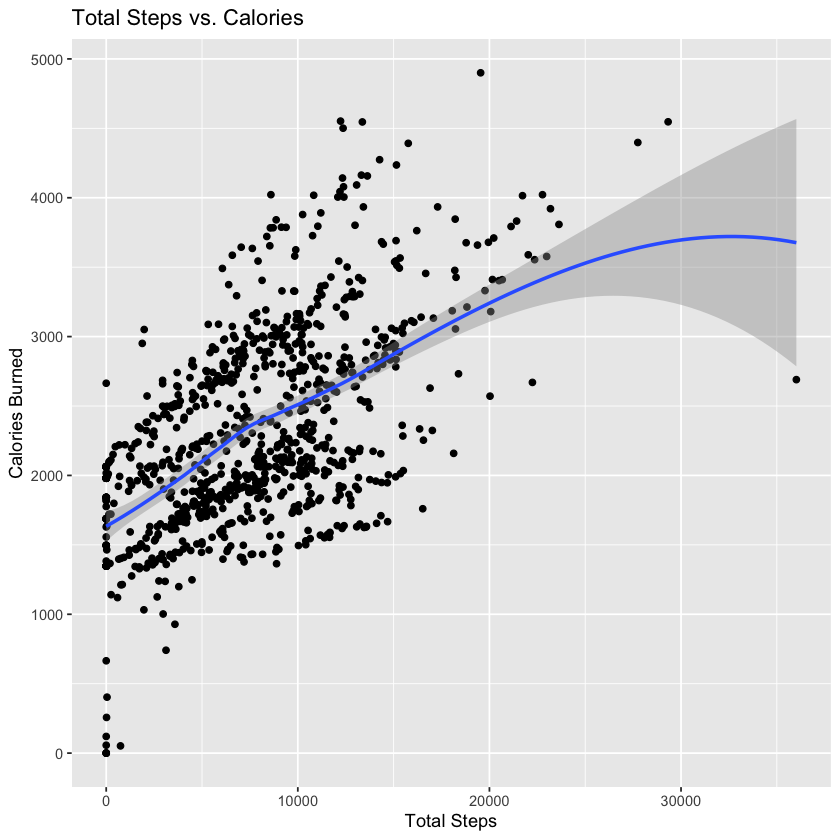

In [14]:
ggplot(data = activity, aes(x = TotalSteps, y = Calories)) +
geom_point() + geom_smooth() + labs(title = "Total Steps vs. Calories", x = "Total Steps", y = "Calories Burned")

The **positive correlation** between total steps and calories confirms that the more active we are(more movement) the more calories we burn.

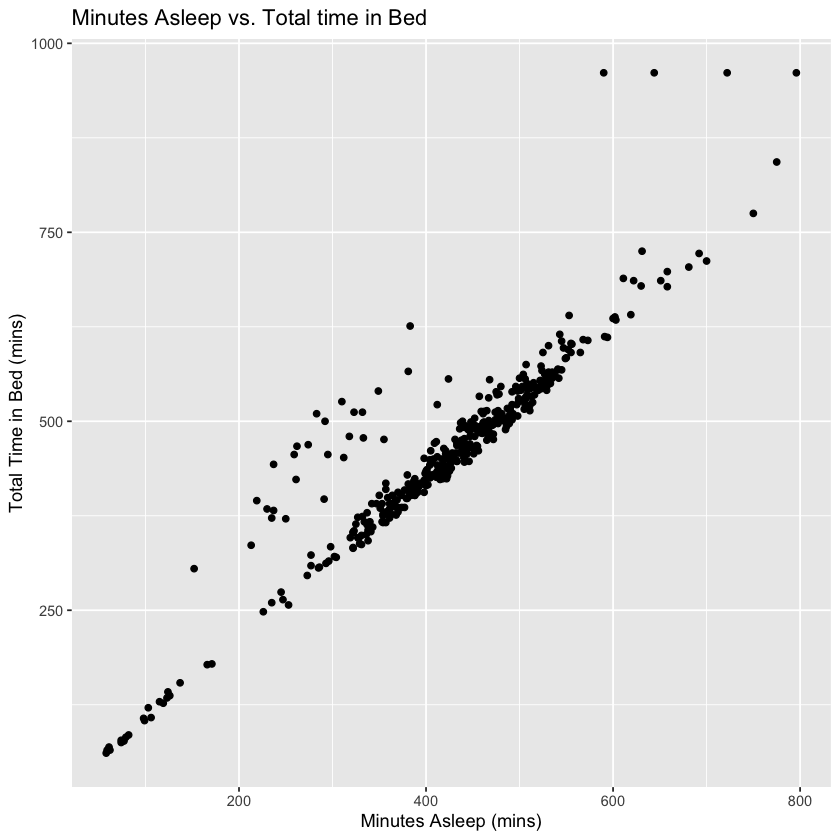

In [15]:
ggplot(data = sleep, aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) + geom_point() +
labs(x = "Minutes Asleep (mins)", y = "Total Time in Bed (mins)", title = "Minutes Asleep vs. Total time in Bed")

As we can see from the plot above there is a **positive correlation** between total sleep time and time in bed, which means that the users sleep quickly once they are off to bed.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


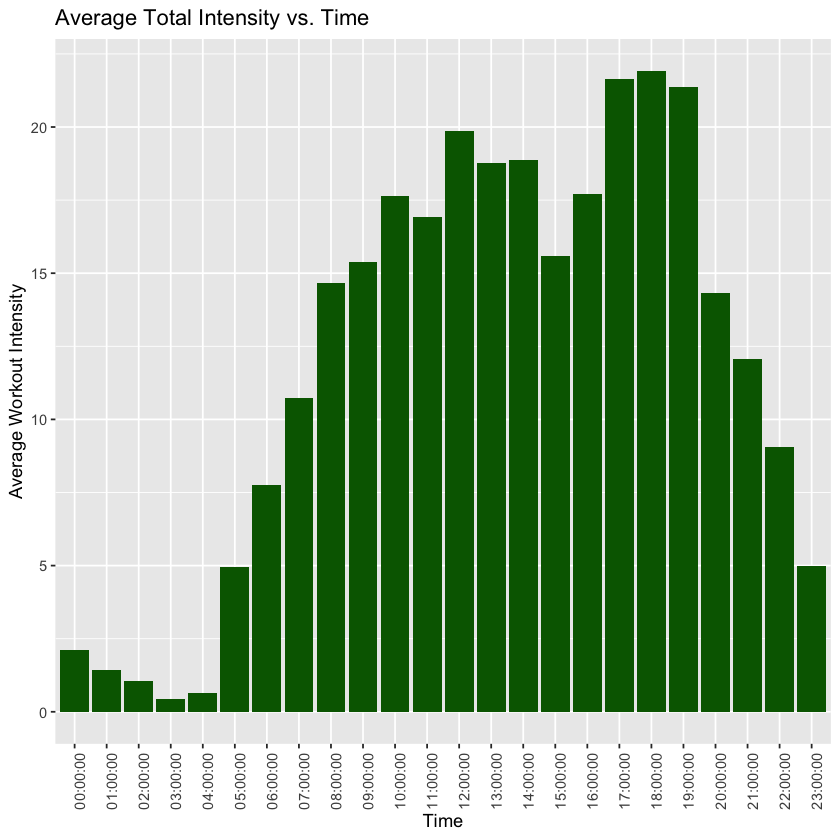

In [16]:
int_new <- intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='dark green') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time", x = "Time", y = "Average Workout Intensity" )

In order to analyze the relationship between 'Total Minutes Asleep' and 'Sedentary Minutes', we need to merge the activity and sleep dataframe.

In [17]:
merged_data = merge(sleep, activity, by = c('Id', 'date'))
head(merged_data)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



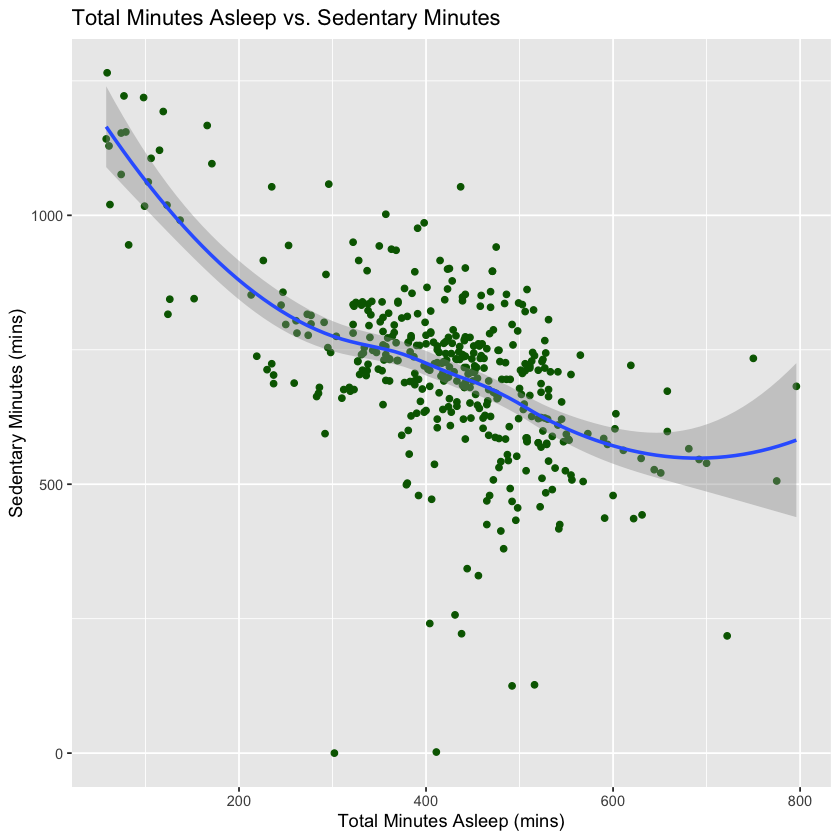

In [18]:
ggplot(data = merged_data, aes(x = TotalMinutesAsleep, y = SedentaryMinutes)) + geom_point(color = 'dark green') +
geom_smooth() + labs(title = "Total Minutes Asleep vs. Sedentary Minutes", x = "Total Minutes Asleep (mins)", y = "Sedentary Minutes (mins)")

As we can see from the graph above, there is a **negative correlation** between the two parameters. This means that reducing the sedentary minutes(increasing active minutes) can help the users have a better sleep.

## Act

Some of the insights that were found after analyzing FitBit Fitness Tracker Data are:

**Bellabeat app ideas**
1. Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps. Bellabeat can encourage people to take at least 8000 explaining the benefits for their health.
  

2. If users want to improve their sleep, Bellabeat should consider using app notifications to go to bed.
  

3. Most activity happens between 5 pm and 7 pm - I suppose, that people go to a gym or for a walk after finishing work. Bellabeat can use this time to remind and motivate users to go for a run or walk.
  

4. As an idea: if users want to improve their sleep, the Bellabeat app can recommend reducing sedentary time.
  

5. After analyzing the FitBit dataset, we found that there is no data about hydration level for the users. Making an assumption that the FitBit devices don't measure hydration levels, Bellabeat can take advantage of Spring. Spring can measure hydration levels of users and send them notifications via the Bellabeat app. I feel that appropriately marketing this particular product can also help Bellabeat boost their sales.